# Lesson 1:  Shapely & Geometry Objects

In [2]:
# import shapely
from shapely.geometry import Point

# create point objects
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point4_3D = Point(9.26, -2.456, 0.57)

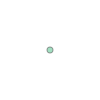

In [5]:
# view contents of variable
point4_3D

In [6]:
# view data type
type(point1)

shapely.geometry.point.Point